<a href="https://colab.research.google.com/github/MS-Mukund/Team50_SMAI/blob/master/MLP_3_512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline
import random

In [2]:
import torchvision
import torchvision.transforms as transforms

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now:', device)

Device available now: cuda


In [4]:
image_transforms = transforms.Compose(
         [transforms.ToTensor(),
         transforms.CenterCrop(28),
         transforms.Normalize((0.5), (0.5))]
)

In [5]:
batchsize = 256
rowsize = 28
colsize = 28
inchannels = 3
kernelsize = 5
stride = 1
padding = 0
poolsize = 3
fc_size1 = 384
fc_size2 = 192
no_classes = 10
epochs = 100


In [6]:
train = torchvision.datasets.CIFAR10(root='./', train=True, download=True, transform=image_transforms)
test = torchvision.datasets.CIFAR10(root='./', train=False, transform=image_transforms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./


In [7]:
traindata = torch.utils.data.DataLoader(train,batch_size=batchsize, shuffle=True, num_workers=2,pin_memory=True)
testdata = torch.utils.data.DataLoader(test,batch_size=batchsize, shuffle=False, num_workers=2,pin_memory=True)

In [8]:
class MLP_3_512(nn.Module):
  def __init__(self, no_classes):
    super().__init__()
    self.fc1 = nn.Linear(3*28*28,512)
    self.fc2 = nn.Linear(512,512)
    self.fc3 = nn.Linear(512,512)
    self.fc4 = nn.Linear(512,no_classes) 

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [9]:
model = MLP_3_512(no_classes).to(device)

In [10]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, momentum = 0.9)
criterion = nn.CrossEntropyLoss().to(device)

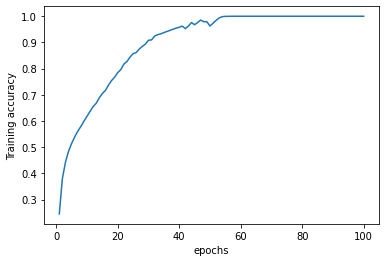

In [12]:
'''Training'''
Acc, loss_a = [], []
for i in range(epochs):
  Loss = 0
  num_correct=0
  tot = 0
  for i,data in enumerate(traindata):
    # iterating through every batch
    x_data = data[0].to(device)
    labels = data[1].to(device)
    optimizer.zero_grad()
    outputs = model(x_data.view(-1, 3*28*28))
    # pred[i] = outputs.argmax(dim=1)
    # act[i] = labels.argmax(dim=1)
    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    Loss += loss
  Acc.append(num_correct/tot)
  loss_a.append(Loss)

plt.plot([i+1 for i in range(epochs)], Acc)
plt.xlabel('epochs')
plt.ylabel('Training accuracy')  
plt.show()

    

In [13]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testdata:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images.view(-1, 3*28*28))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print("Accuracy of the on test images : ",100 * correct / total)



Accuracy of the on test images :  55.56
